In [1]:
from concorde.tsp import TSPSolver
from matplotlib import collections  as mc
import numpy as np
import pandas as pd
import time
import pylab as pl

In [2]:
cities = pd.read_csv('cities.csv')

In [3]:
cities.head()

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


In [4]:
solver = TSPSolver.from_data(
    cities.X,
    cities.Y,
    norm="EUC_2D"
)

t = time.time()
tour_data = solver.solve(time_bound = 60.0, verbose = True, random_seed = 42) # solve() doesn't seem to respect time_bound for certain values?
print(time.time() - t)
print(tour_data.found_tour)

78.7171759605
True


In [5]:
pd.DataFrame({'Path': np.append(tour_data.tour,[0])}).to_csv('submission.csv', index=False)

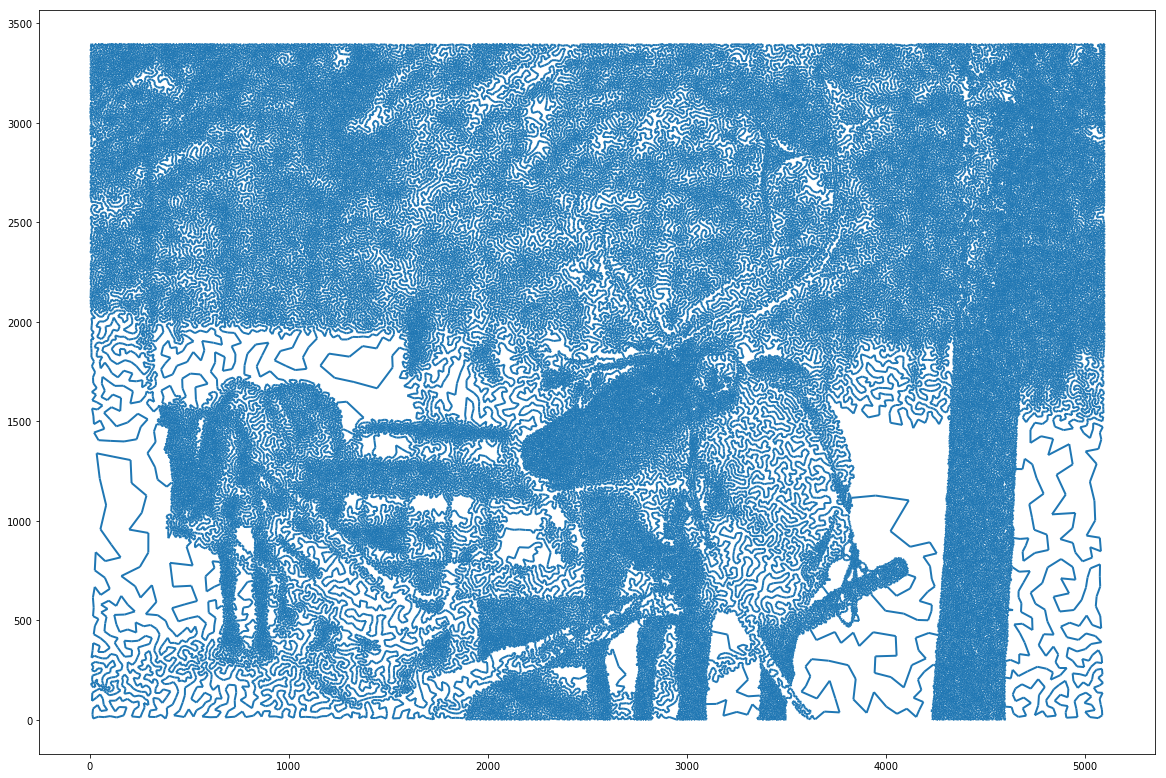

In [6]:
# Plot tour
lines = [[(cities.X[tour_data.tour[i]],cities.Y[tour_data.tour[i]]),(cities.X[tour_data.tour[i+1]],cities.Y[tour_data.tour[i+1]])] for i in range(0,len(cities)-1)]
lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.add_collection(lc)
ax.autoscale()